**External Scripts**
* 🌟 Due To Sum Nulls in an important Feature I created A simple script the Scrap 🕷️ on imdb website and collect some missing informations

**About Dataset**
* This dataset is contain all Netflix Movie or TV Show

**Objective**
* EDA and Data Visulaization

-----
## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500);
sns.set_palette('pastel');

----

In [2]:
data = pd.read_csv('netflix_title.csv')

In [3]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace = True, axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8806 non-null   object
 1   type          8806 non-null   object
 2   title         8806 non-null   object
 3   director      6206 non-null   object
 4   cast          7981 non-null   object
 5   country       8515 non-null   object
 6   date_added    8796 non-null   object
 7   release_year  8806 non-null   int64 
 8   rating        8806 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8806 non-null   object
 11  description   8806 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


In [5]:
# Percentage of null in each col
cols = data.isna().sum().index
values = data.isna().sum().values
for i, j in zip(cols, values):
    percentage = (j / len(data)) * 100
    if percentage > 0:
        print(f"{i} = {round(percentage, 2)} %")

director = 29.53 %
cast = 9.37 %
country = 3.3 %
date_added = 0.11 %


----
## Data Preprocessing

### Director

In [6]:
# If Director is null so we will assume that the Director = netflix
data['director'].fillna("netflix", inplace = True)

### Country

In [7]:
# Country has 3.3% Null value we can fill it by NA 
data['country'].fillna("NA", inplace = True)

In [8]:
# Remove any Space in country
data['country'] = data['country'].apply(lambda x : x.replace(" ", ""))

### Date Added

In [9]:
# Lets convert to pandas date
data['date_added'] = pd.to_datetime(data['date_added'])

In [10]:
# Let's fill date added with the mod
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])

### Cast

In [11]:
# Let's fill Null Cast with NA
data['cast'].fillna("NA", inplace = True)

-----

In [12]:
# Let's Check For Null again
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

-----
## EDA

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,UnitedStates,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,netflix,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",SouthAfrica,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,netflix,NA,UnitedStates,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,netflix,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:xlabel='type', ylabel='count'>

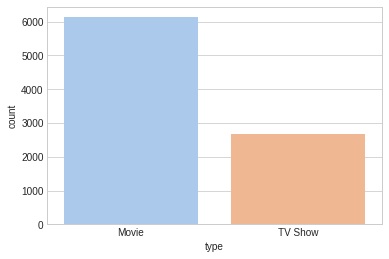

In [14]:
# How many Movie and TV Show does netflix have ?
sns.countplot(x = data['type'])

* Netflix have Number of Movies greater than Number of TV Show

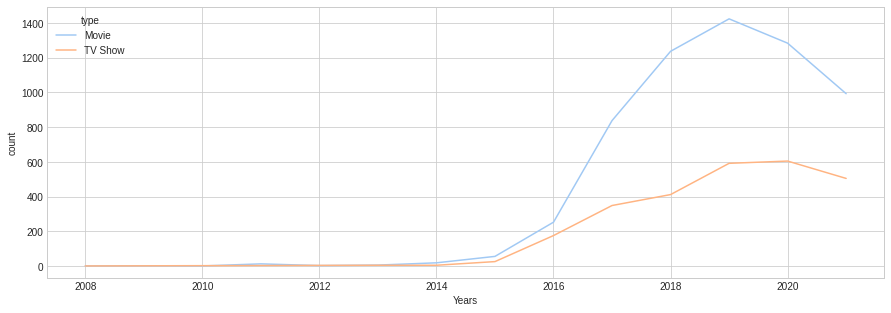

In [15]:
# Number of added Movie or TV Show Through Years
plt.figure(figsize = (15, 5))
df = data.groupby(data.date_added.dt.year)['type'].value_counts().to_frame(name = "count")
sns.lineplot(x = 'date_added', y = 'count', data = df, hue = 'type')
plt.xlabel("Years");

* After 2014 Number of Movie get larger than TV Show 
* After mid 2018 Number of Movies Get decreased

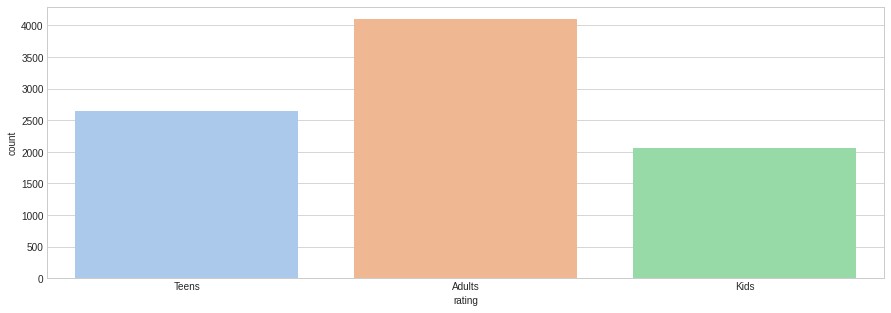

In [16]:
# Show Freq of each Rating Type
plt.figure(figsize = (15, 5));
kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
teens = ['PG-13', 'TV-14']
adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def convert_rate(rate):
    if rate in kids:
        return "Kids"
    elif rate in teens:
        return "Teens"
    elif rate in adults:
        return "Adults"

df = data['rating'].apply(lambda x: convert_rate(x))
sns.countplot(x = df);

* Most of Netflix Content is for Adults rating

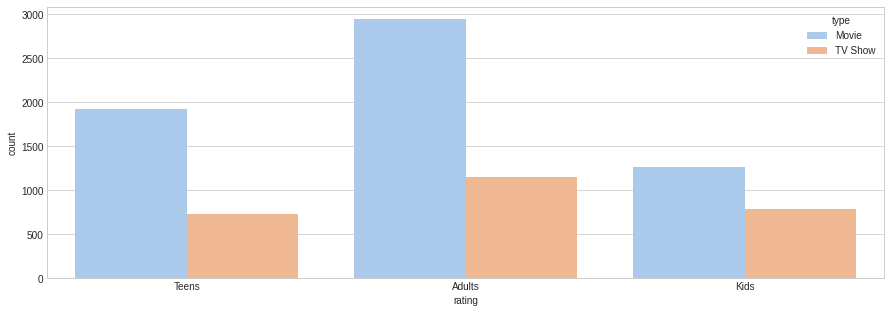

In [17]:
# Is Adults Movie greater than TV Show ?
plt.figure(figsize = (15, 5));
sns.countplot(x = df, hue = data['type']);

* Adults Movie is greater than TV Shows

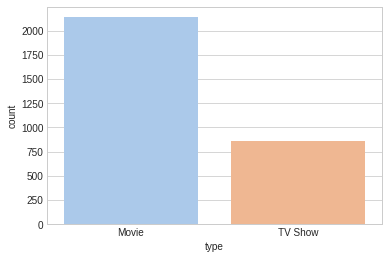

In [18]:
# Is Content added in us Movie of TV Show ?
us_df = data[ data['country'] == "UnitedStates"]
sns.countplot(x = us_df['type']);

* Most of Content in US Is Movies

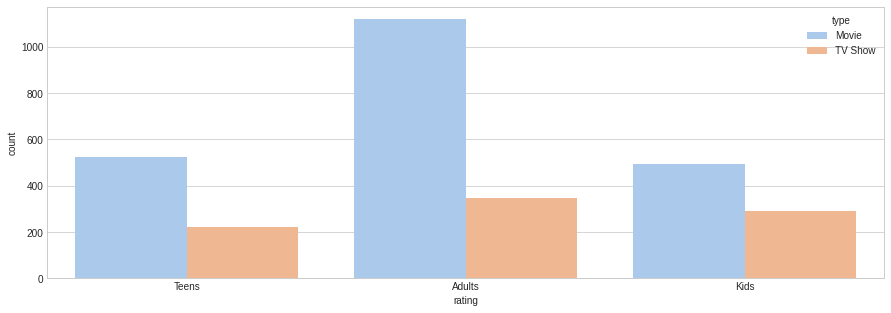

In [19]:
# Rating is USA based on Movie or TV Show
plt.figure(figsize = (15, 5));

df = us_df['rating'].apply(lambda x: convert_rate(x))
sns.countplot(x = df, hue = us_df['type']);

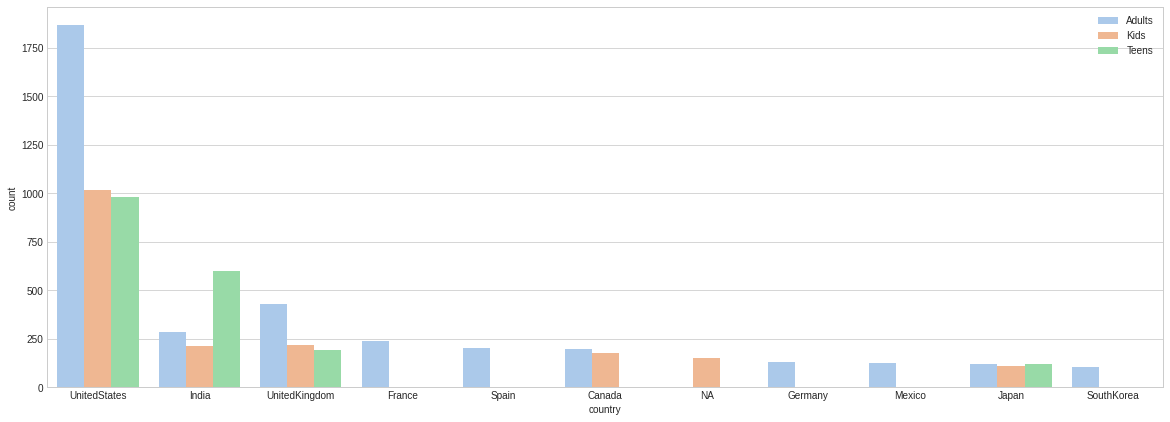

In [20]:
# Number of Movie or TV Show based on Rating
plt.figure(figsize = (20, 7))
df = data.copy()
df['rating'] = data['rating'].apply(lambda x: convert_rate(x))
country = df['country'].apply(lambda x: x.split(",")).to_frame().set_index(df['rating']).explode('country').reset_index()
df = country.value_counts().reset_index().rename(columns= {0 : "count"})
sns.barplot(data = df.head(20), x = 'country', y = 'count', hue = 'rating');
plt.legend(loc = "upper right");

* Most of content in US Movies or TV Shows is for Adults
* Number of Movie or TV Show in US For kids is greater than Teens
* Most of content in india is for Teens
* Countries like France, Spain, German, Mexico, South Korea have a Adults Movie onlyC
* Canada Doesn't have Teen's Content

Mean : 99.58


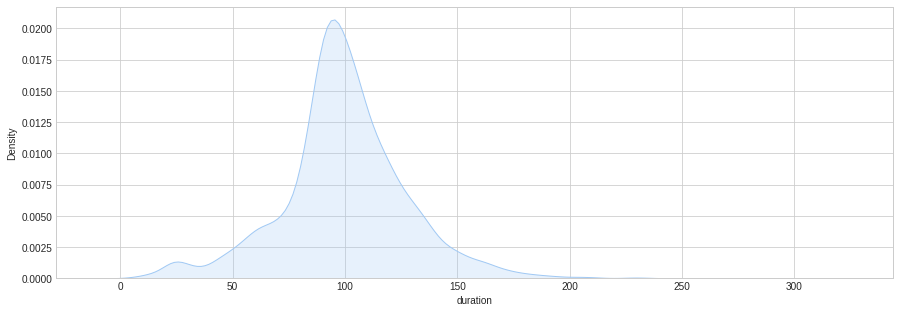

In [21]:
# What is the Distribution of Movie Duration ?
plt.figure(figsize = (15, 5));
movie_duration = data[ data['duration'].str.contains('min') ]['duration'].apply(lambda x: x.split(" ")[0]).astype(int)
sns.kdeplot(x = movie_duration, shade=True)
print(f"Mean : {round(movie_duration.mean(), 2)}")

* Most Movies Duration is distributed around 100 Min

<AxesSubplot:xlabel='duration', ylabel='count'>

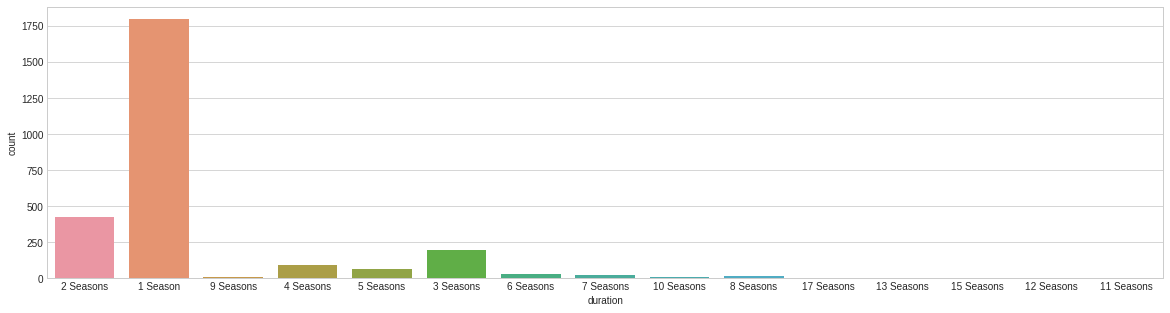

In [22]:
# What is the Freq of TV Shows Duration ?
plt.figure(figsize = (20, 5));
tv_show_duration = data[ data['duration'].str.contains("S") ]
sns.countplot(x = tv_show_duration['duration'])

* `1 Season TV Show` is the most common in netflix 

In [23]:
# What is the Max Freq Country we have ?
print(f"{data['country'].value_counts().index[0]} : {data['country'].value_counts()[0]}")

UnitedStates : 2999


* United States is the Max Freq Country That make films in Netflix

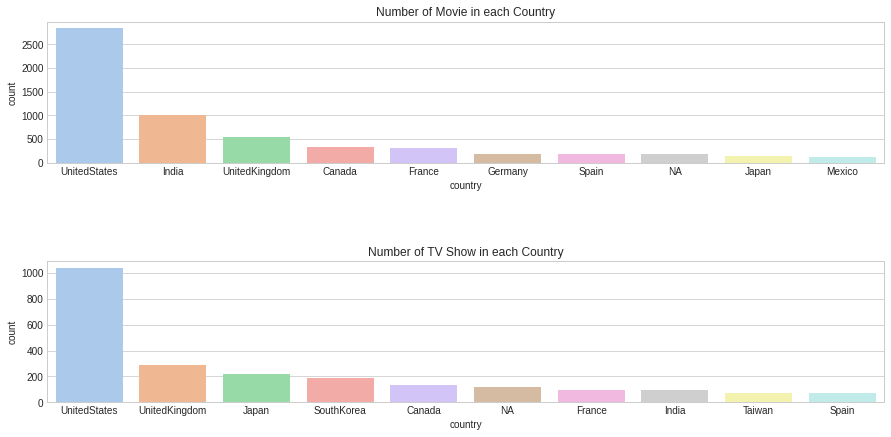

In [24]:
plt.figure(figsize = (15, 7))

# Solving Nesting columns Problem
df = data['country'].apply(lambda x: x.split(",")).to_frame().set_index(data['type']).explode('country').reset_index()

# Get count for each country
df = df.value_counts().to_frame().reset_index()
# Get Movie Type only 
movies_country_count = df[ df['type'] == 'Movie' ].rename(columns = {0 : "count"})
tvShow_country_count = df[ df['type'] == 'TV Show' ].rename(columns = {0 : "count"})

# Plotting 
plt.subplot(2, 1, 1)
plt.title("Number of Movie in each Country")
sns.barplot(data = movies_country_count.head(10), x = 'country', y = 'count')

plt.subplots_adjust(hspace = 0.7)

plt.subplot(2, 1, 2)
plt.title("Number of TV Show in each Country")
sns.barplot(data = tvShow_country_count.head(10), x = 'country', y = 'count');

* United States is the Max Freq in Number of movies and TV Shows
* [India, United Kingdom, Canada, ...] Have Number of Movies Greater than Number of TV Shows
* Most of content in `southKorea` is TV Shows 

In [25]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,UnitedStates,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,netflix,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",SouthAfrica,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,netflix,NA,UnitedStates,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,netflix,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:xlabel='listed_in', ylabel='count'>

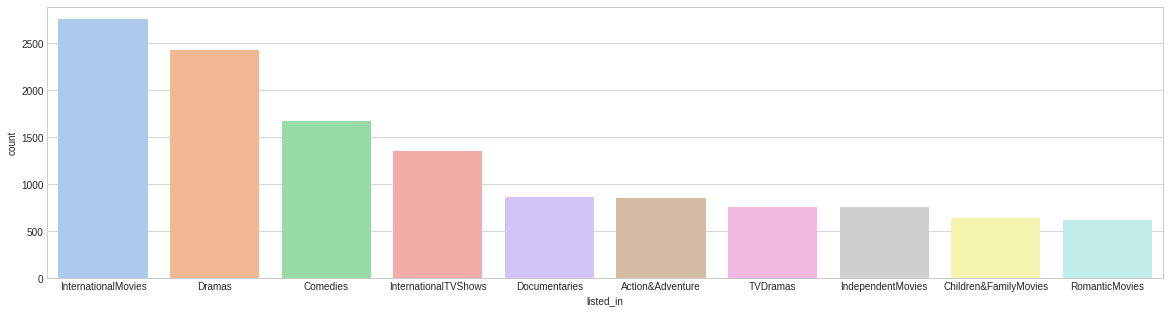

In [26]:
# Most 10 Types 
plt.figure(figsize = (20, 5))
df = data['listed_in'].apply(lambda x: x.replace(" ", "").split(",")).to_frame().explode('listed_in').value_counts().reset_index().rename(columns = {0 : "count"})
sns.barplot(x = 'listed_in', y = 'count', data = df.head(10))

* Most of Content is International Movies then Dramas

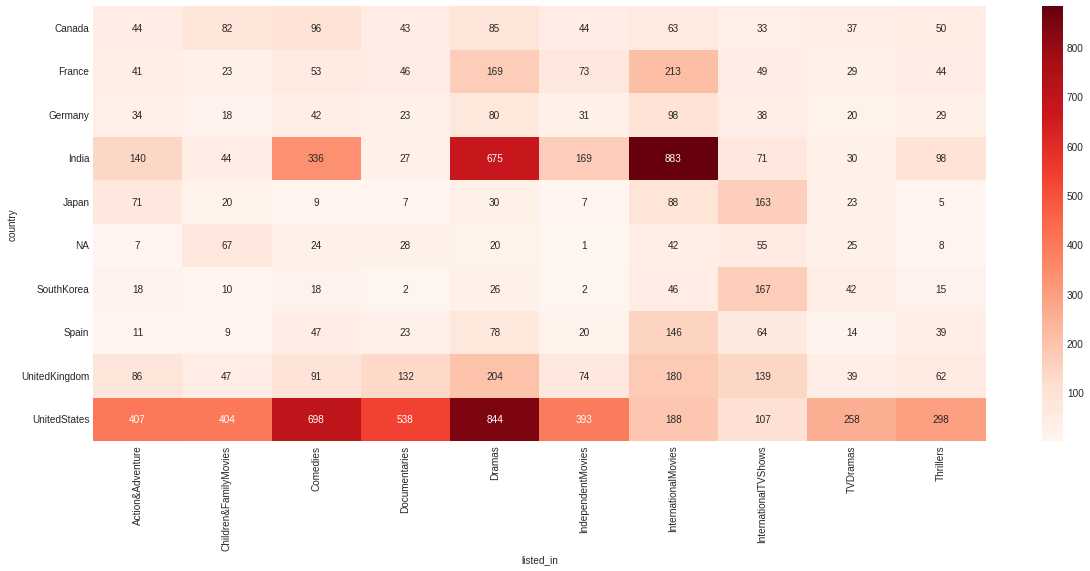

In [100]:
plt.figure(figsize = (20, 8))
df = data.copy()
df['country'] = df['country'].apply(lambda x : x.replace(" ", "").split(","))
df['listed_in'] = df['listed_in'].apply(lambda x : x.replace(" ", "").split(","))
df = df.explode('country')
df = df.explode('listed_in')
top_10_country = df['country'].value_counts().head(10).index
df = df[ df['country'].isin(top_10_country) ]
top_10_types = df['listed_in'].value_counts().head(10).index
df = df[ df['listed_in'].isin(top_10_types) ]

df = df.value_counts(['country', 'listed_in']).reset_index().rename(columns = {0 : 'count'})
df = df.pivot_table(values = 'count', index = 'country', columns = 'listed_in')
sns.heatmap(df, annot=True, fmt="d", cmap='Reds');

* Most Content in india is International Movies, Dramas and Comedies
* Most Content in UnitedKingdom Dramas, International Movies, and Documentaries
* Most Content in US Dramas, Comedies and Documentaries
